In [1]:
from wrangling import G,X_test,X_train,y_test,y_train
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data import Data
import pandas as pd

In [2]:
X_train.shape

(1261, 36, 48)

In [3]:
y_train.shape

(36, 1261)

In [4]:
[1,2] + [3,4]

[1, 2, 3, 4]

In [5]:
y = []
for i in range(36):
    
    whole = list(y_train[i,:]) + list(y_test[i,:])
    y.append(whole)

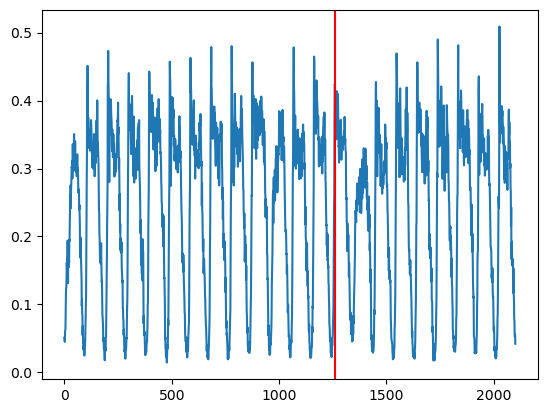

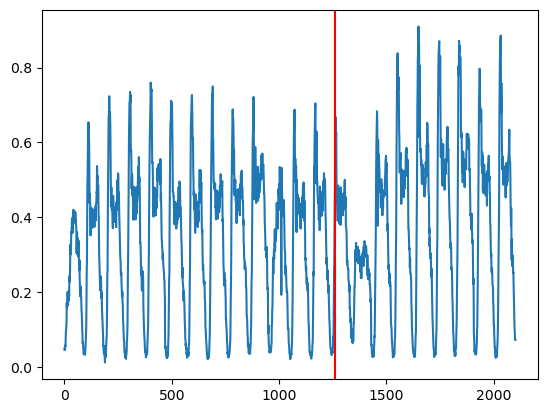

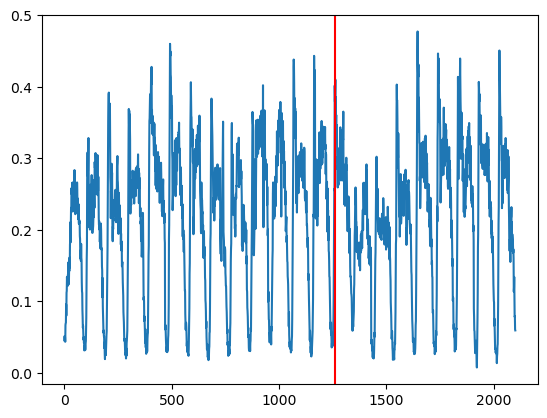

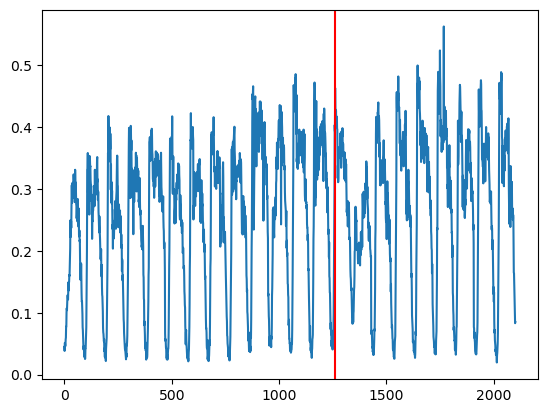

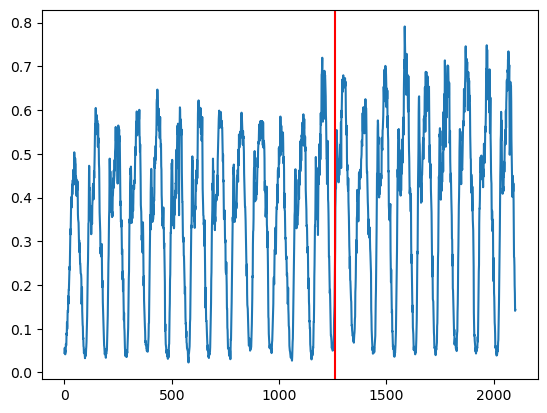

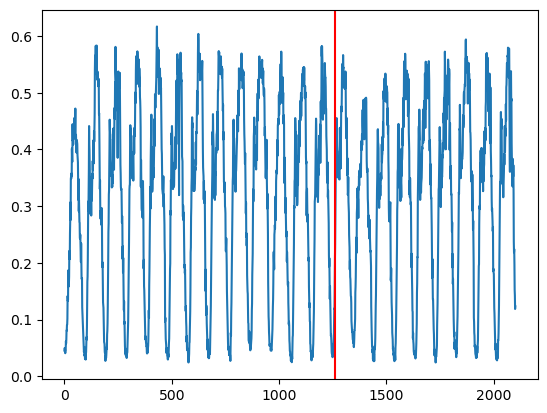

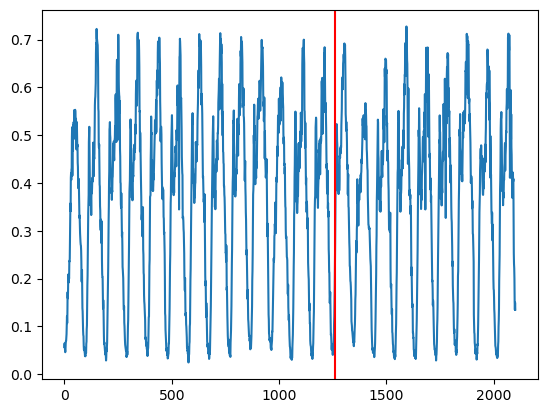

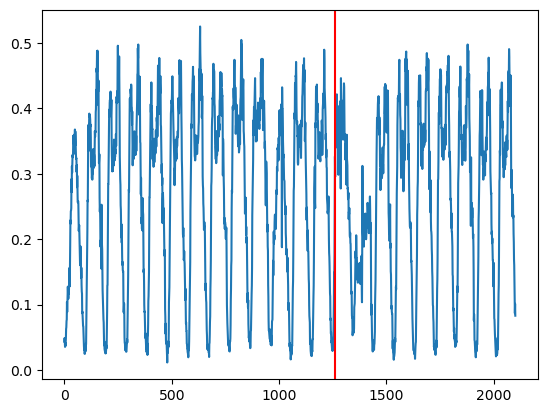

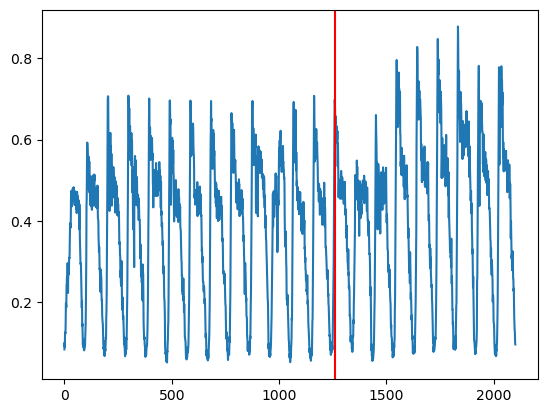

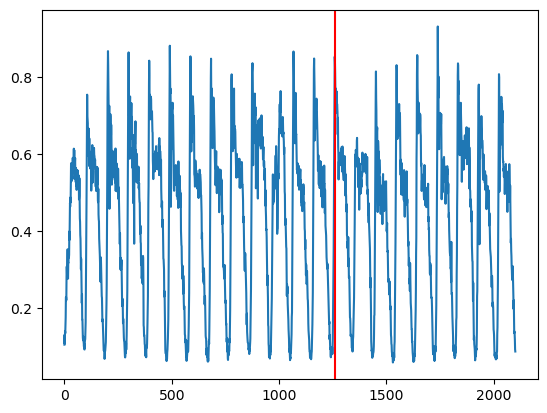

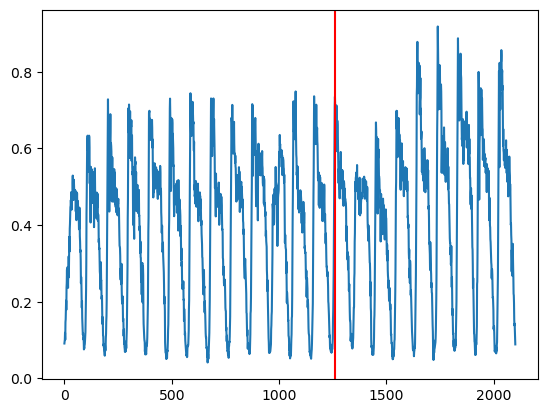

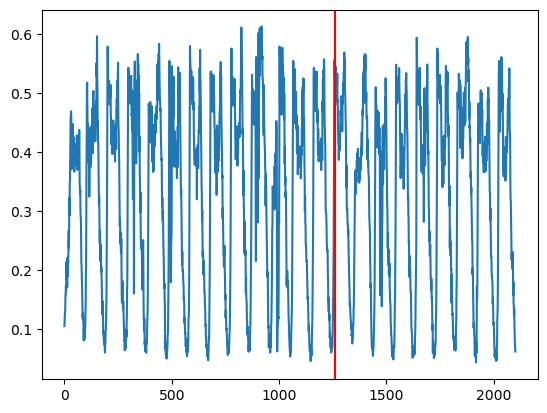

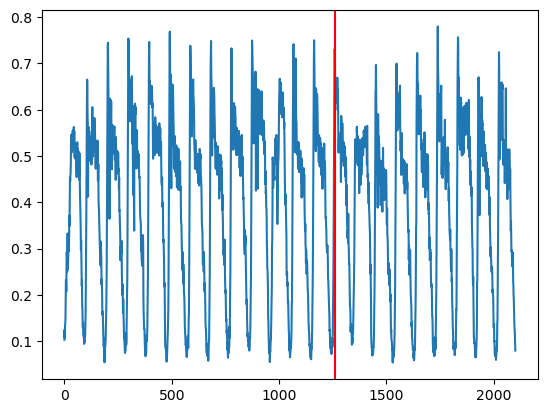

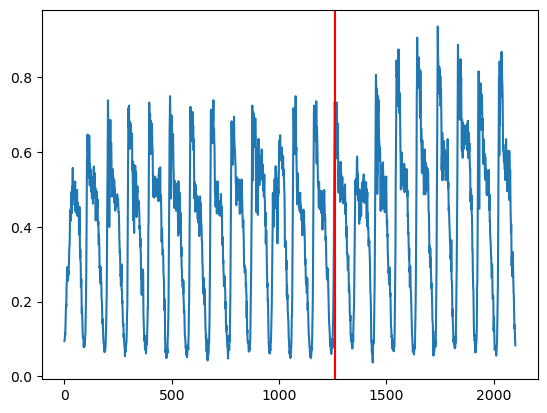

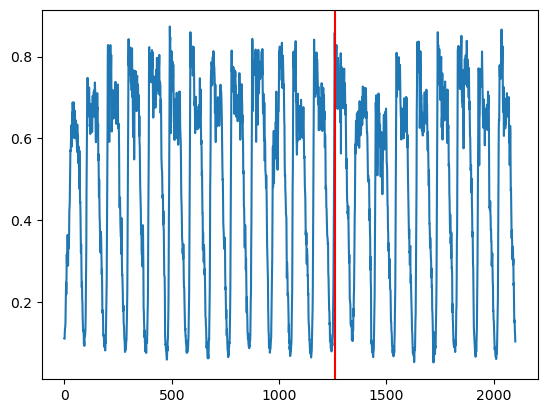

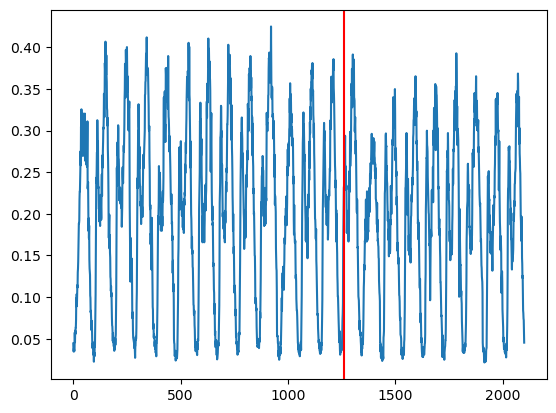

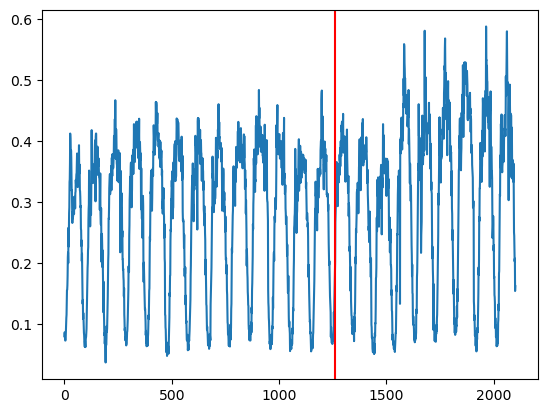

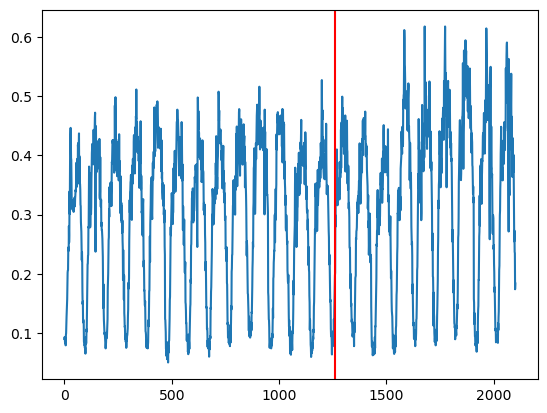

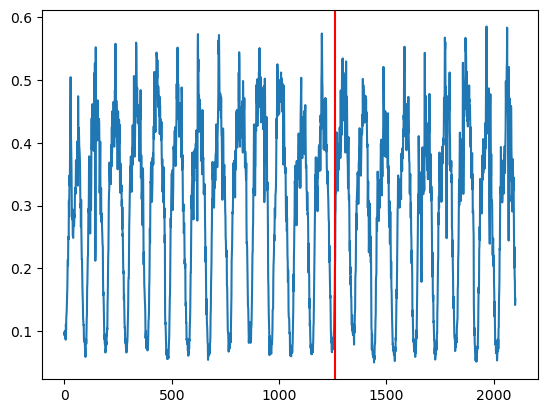

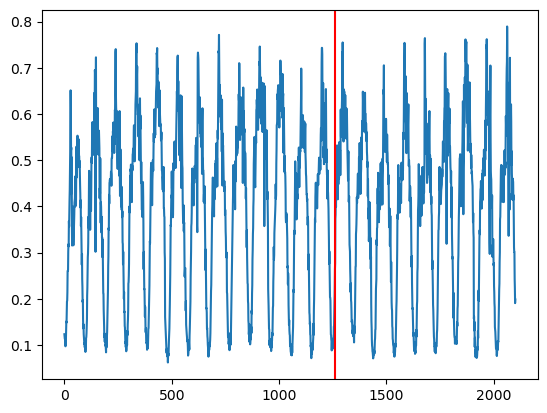

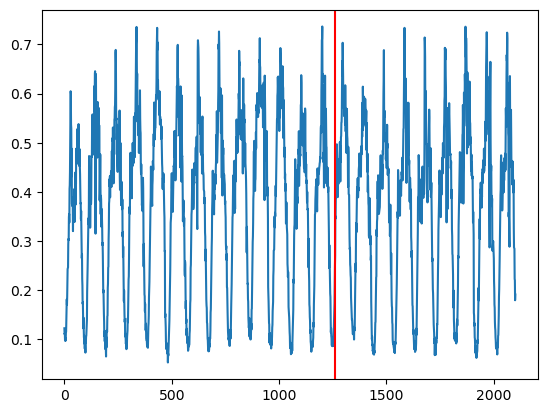

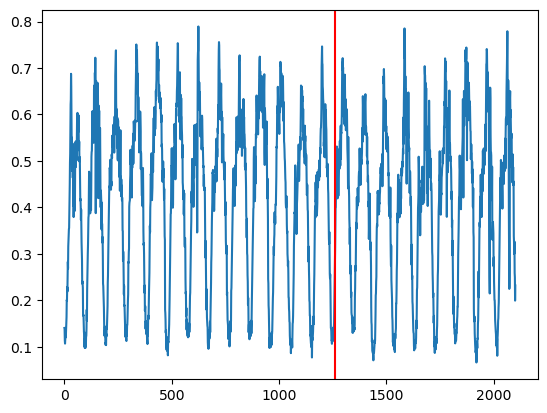

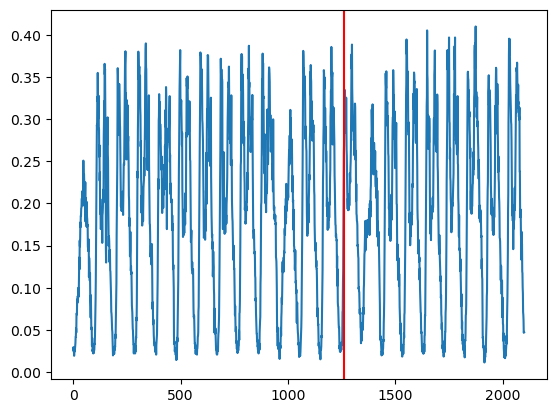

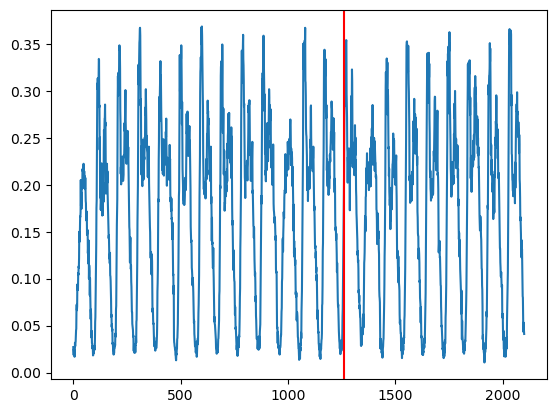

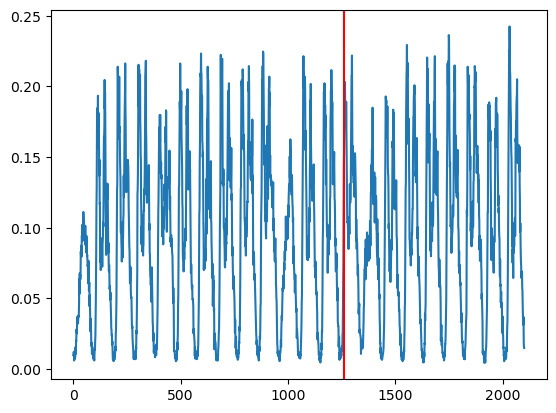

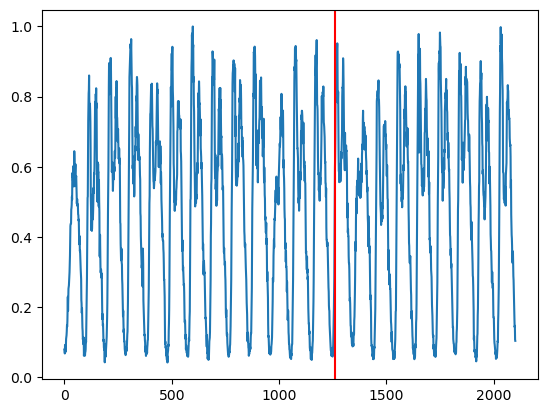

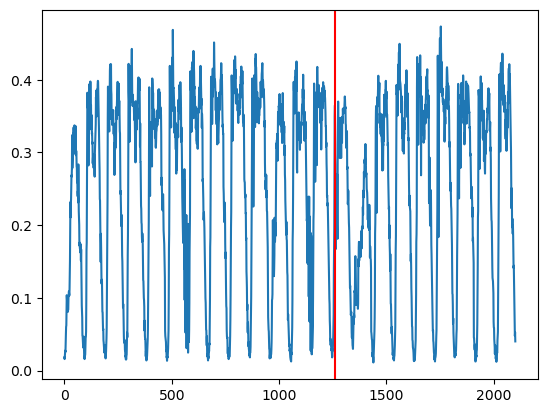

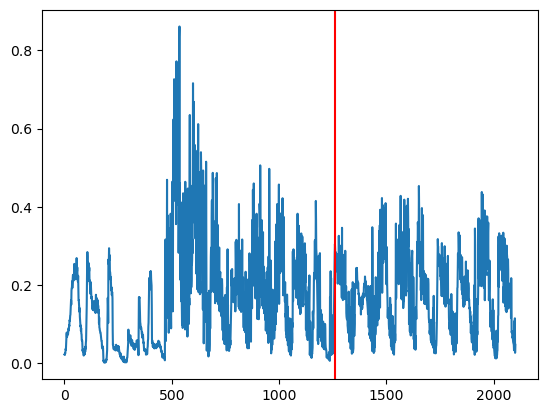

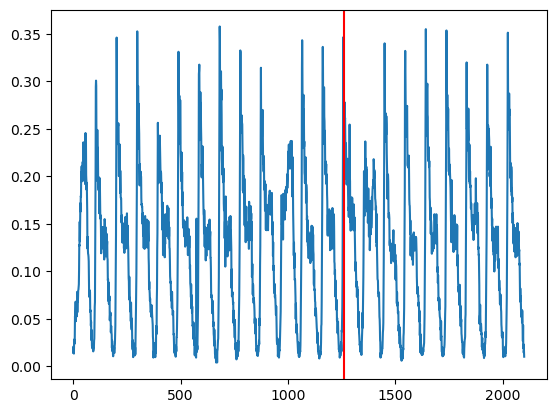

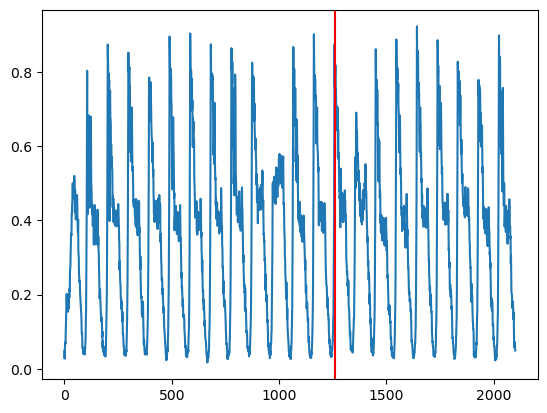

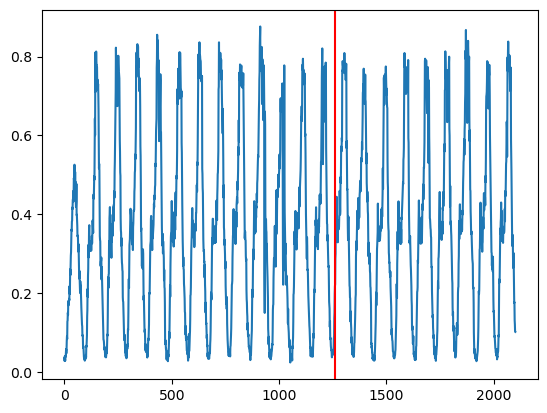

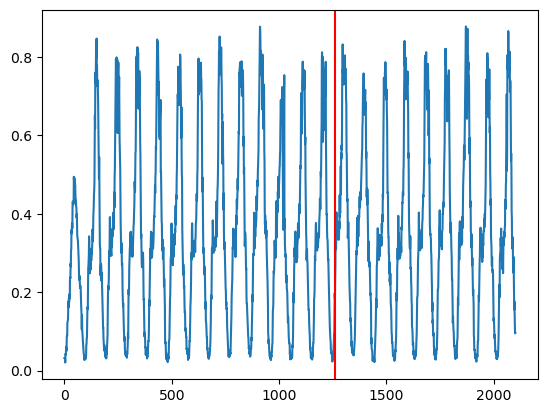

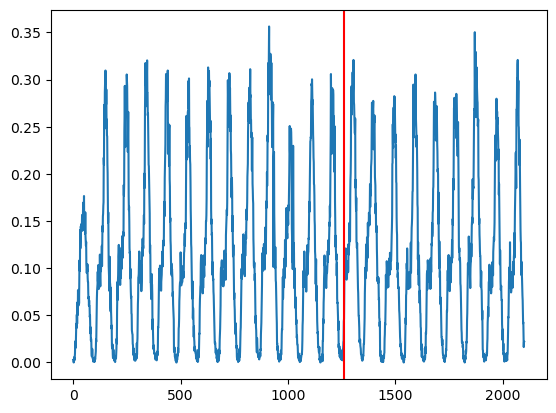

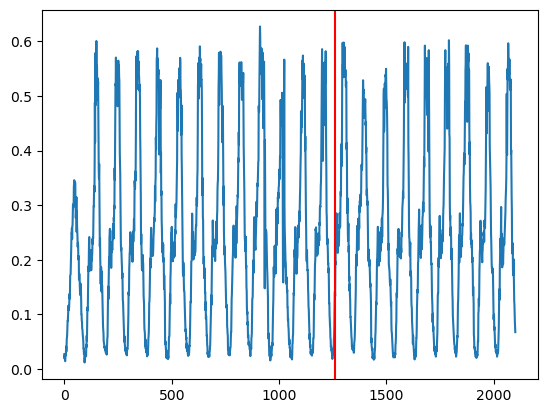

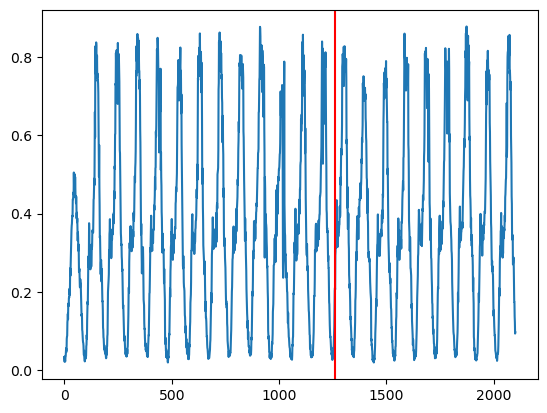

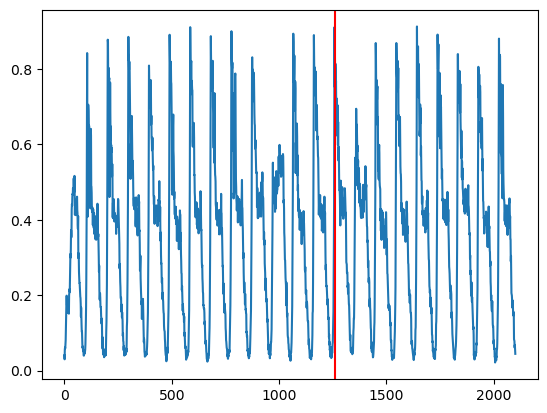

In [6]:
for s in y:
    plt.plot(s)
    plt.axvline(1261,color='red')
    plt.show()


In [7]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

train_iter = StaticGraphTemporalSignal(
    edge_index= np.array(list(G.edges())).transpose(),
    edge_weight=np.ones(len(G.edges)),
    features = X_train,
    targets = y_train.T#[4,:].reshape((1261,1))
)

test_iter = StaticGraphTemporalSignal(
    edge_index= np.array(list(G.edges())).transpose(),
    edge_weight=np.ones(len(G.edges)),
    features = X_test,
    targets = y_test.T#[4,:].reshape((840,1))
)


In [2]:
import torch

model_dict = torch.load('first_model.pth')

In [25]:
model_dict['recurrent.conv_x_i.lins.0.weight'].size()

torch.Size([36, 48])

In [28]:
model_dict['Lw']

tensor([[1.0010, 1.0000, 1.0001,  ..., 1.0000, 0.9992, 1.0011],
        [1.0013, 1.0000, 1.0002,  ..., 1.0000, 1.0000, 1.0003],
        [0.9999, 1.0000, 1.0005,  ..., 1.0006, 0.9996, 1.0009],
        ...,
        [0.9977, 1.0004, 1.0001,  ..., 0.9993, 1.0002, 1.0001],
        [0.9997, 1.0002, 0.9993,  ..., 0.9997, 1.0002, 1.0001],
        [0.9992, 0.9993, 1.0009,  ..., 1.0000, 1.0001, 1.0001]])

In [3]:
for k,v in model_dict.items():
    print(k,v.size())

edge_weights torch.Size([43])
Lw torch.Size([36, 36])
Lb torch.Size([36])
recurrent.w_c_i torch.Size([1, 36])
recurrent.b_i torch.Size([1, 36])
recurrent.w_c_f torch.Size([1, 36])
recurrent.b_f torch.Size([1, 36])
recurrent.b_c torch.Size([1, 36])
recurrent.w_c_o torch.Size([1, 36])
recurrent.b_o torch.Size([1, 36])
recurrent.conv_x_i.bias torch.Size([36])
recurrent.conv_x_i.lins.0.weight torch.Size([36, 48])
recurrent.conv_x_i.lins.1.weight torch.Size([36, 48])
recurrent.conv_x_i.lins.2.weight torch.Size([36, 48])
recurrent.conv_h_i.bias torch.Size([36])
recurrent.conv_h_i.lins.0.weight torch.Size([36, 36])
recurrent.conv_h_i.lins.1.weight torch.Size([36, 36])
recurrent.conv_h_i.lins.2.weight torch.Size([36, 36])
recurrent.conv_x_f.bias torch.Size([36])
recurrent.conv_x_f.lins.0.weight torch.Size([36, 48])
recurrent.conv_x_f.lins.1.weight torch.Size([36, 48])
recurrent.conv_x_f.lins.2.weight torch.Size([36, 48])
recurrent.conv_h_f.bias torch.Size([36])
recurrent.conv_h_f.lins.0.weight

In [5]:
def get_weight(filter,weight):
    return model_dict[weight][filter]

In [14]:
import matplotlib.pyplot as plt

In [18]:
get_weight(0,'recurrent.conv_h_f.bias')

tensor(0.0010)

In [27]:
model_dict['sage.lin.bias']

tensor([-0.1660, -0.1649,  0.0138, -0.1470, -0.0366,  0.0112,  0.0145,  0.0784,
        -0.0760,  0.0907, -0.0112, -0.1371, -0.1226, -0.0588, -0.1027, -0.0469,
        -0.0220,  0.0182, -0.1104,  0.1427,  0.1469,  0.1341,  0.0689, -0.0173,
        -0.0953,  0.1110,  0.0094,  0.0703, -0.0354,  0.0301,  0.0232,  0.0352,
         0.1663,  0.0460, -0.0922,  0.0718])

In [24]:
model_dict['recurrent.conv_x_f.lins.0.weight'][0]

tensor([ 0.0832,  0.0220, -0.0677, -0.1165,  0.1444,  0.0715, -0.1164,  0.0783,
        -0.2234, -0.1204, -0.0246,  0.1626, -0.1131,  0.0568,  0.0871,  0.0604,
         0.0669,  0.2031, -0.1735, -0.1544,  0.0211,  0.1473,  0.1577,  0.2005,
        -0.0262, -0.0341, -0.0832,  0.0020,  0.1909,  0.2140,  0.0243, -0.0859,
        -0.2263,  0.2433,  0.1339, -0.0793,  0.0451,  0.0480,  0.1148,  0.0678,
        -0.2113, -0.0185,  0.0644, -0.0891, -0.2448, -0.1939, -0.0508,  0.2334])

(array([4., 3., 4., 6., 4., 6., 9., 3., 4., 5.]),
 array([-0.24483974, -0.19602877, -0.1472178 , -0.09840681, -0.04959584,
        -0.00078487,  0.04802611,  0.09683708,  0.14564806,  0.19445904,
         0.24327001]),
 <BarContainer object of 10 artists>)

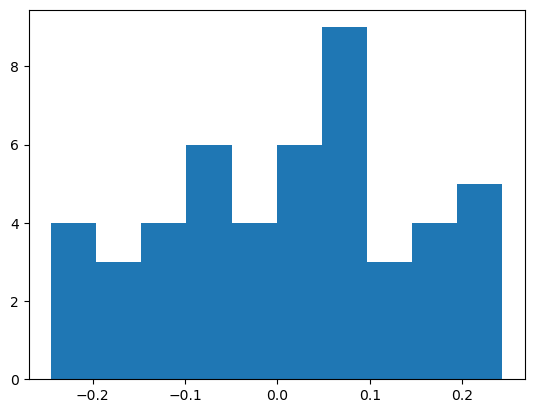

In [23]:
plt.hist(get_weight(0,'recurrent.conv_x_f.lins.0.weight'))

In [8]:
import torch
import torch.nn.functional as F
from torch import nn
from torch_geometric_temporal.nn.recurrent import GConvLSTM

class GLSTM(torch.nn.Module):
    def __init__(self, node_features, filters,num_edges):
        super(GLSTM, self).__init__()
        self.recurrent = GConvLSTM(node_features, filters, 4)
        self.linear = nn.Linear(filters,1)                           
        self.edge_weight = nn.Parameter(torch.ones(num_edges,dtype=torch.float))
        
    def forward(self, x, edge_index, hidden_state, cell_state):
        hs = []
        cs = []
        
        h,c = self.recurrent(x, edge_index, self.edge_weight,H=hidden_state[0],C=cell_state[0])
        hs.append(h)
        cs.append(c)
        
        y = F.relu(h)
        y = self.linear(y)

        return y,hs,cs

In [9]:
from tqdm import tqdm

train_losses = []
test_losses = []

for i in range(36):
    train_iter = StaticGraphTemporalSignal(
        edge_index= np.array(list(G.edges())).transpose(),
        edge_weight=np.ones(len(G.edges)),
        features = X_train,
        targets = y_train[i,:].reshape((1261,1))
    )

    test_iter = StaticGraphTemporalSignal(
        edge_index= np.array(list(G.edges())).transpose(),
        edge_weight=np.ones(len(G.edges)),
        features = X_test,
        targets = y_test[i,:].reshape((840,1))
    )

   

    batch_size = 4
    model = GLSTM(node_features=48,filters=29,num_edges=43)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    tr_preds = []
    tr_y = []

    train_loss = []
    test_loss = []
    t = tqdm(range(100),leave=True)

    for epoch in t:
        model.train()
        
        H = [None,None]
        C = [None,None]
        cost = torch.zeros(1)
        for time, snapshot in enumerate(train_iter):
            y_hat,H,C = model(snapshot.x, snapshot.edge_index, H, C)
            cost = cost + torch.mean((y_hat-snapshot.y)**2)
            if time == batch_size:
                train_loss.append(cost.detach()/(batch_size+1))
            if time%batch_size == 0 or time == 1260:
                cost.backward()
                optimizer.step()
                optimizer.zero_grad()
                cost = 0
                H = [None,None]
                C = [None,None]
        with torch.no_grad():
            H_t = [None,None]
            C_t = [None,None]
            model.eval()
            test_cost = 0
            for ttime, tsnapshot in enumerate(test_iter):
                pred,H_t,C_t = model(tsnapshot.x, tsnapshot.edge_index, H_t,C_t)
                test_cost = test_cost + torch.mean((pred-tsnapshot.y)**2)

                if ttime%batch_size == 0:
                    H_t = [None,None]
                    C_t = [None,None]
            test_cost = test_cost / (ttime+1)
            test_cost = test_cost.item()
            test_loss.append(test_cost)
            
        t.set_description(f'train MSE:{train_loss[-1]:3f}, test MSE:{test_loss[-1]:3f}')
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    

train MSE:0.000603, test MSE:0.004434: 100%|██████████| 100/100 [16:54<00:00, 10.15s/it]


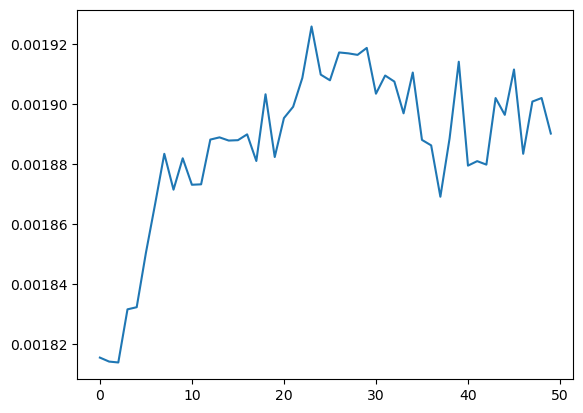

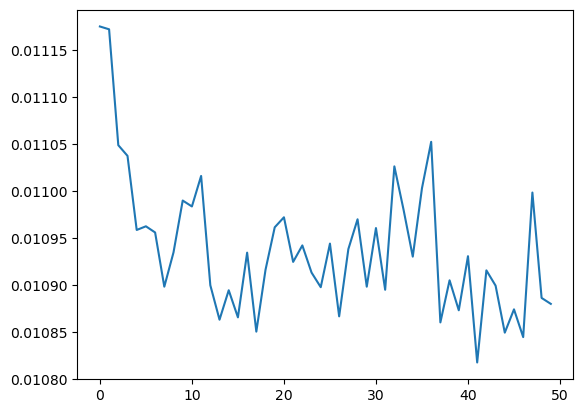

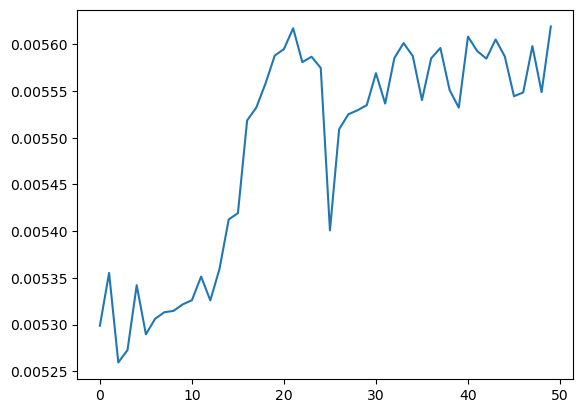

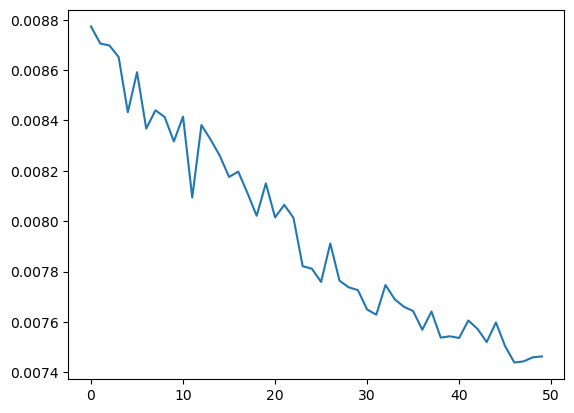

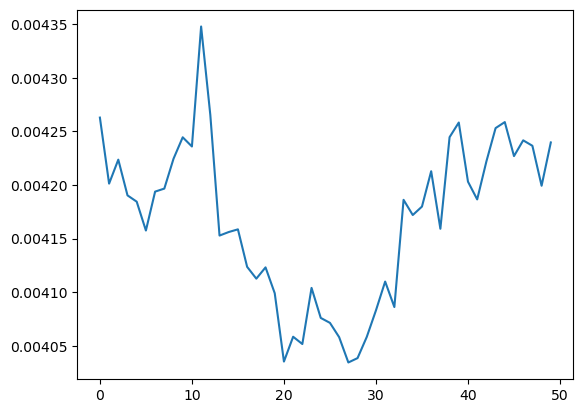

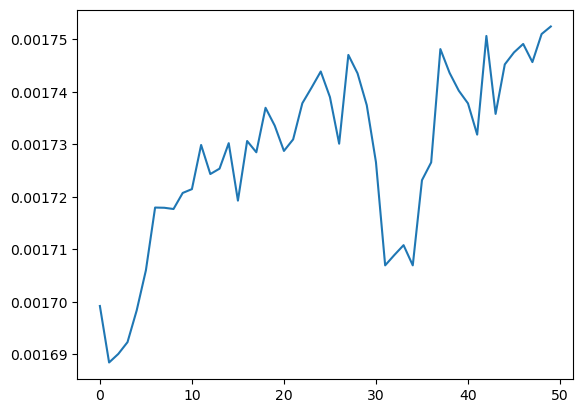

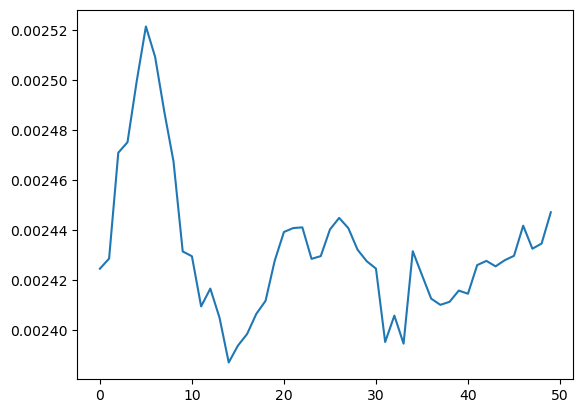

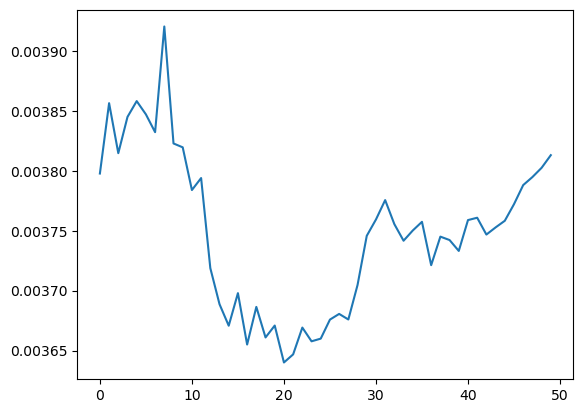

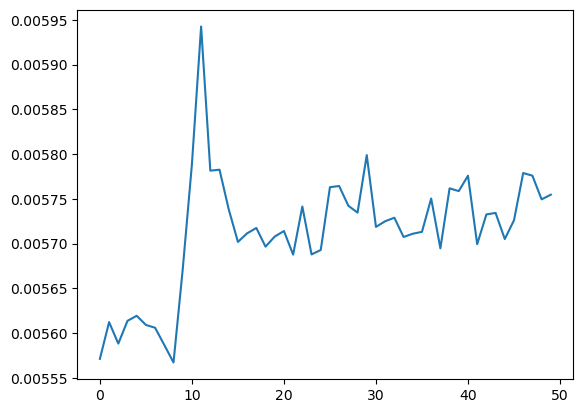

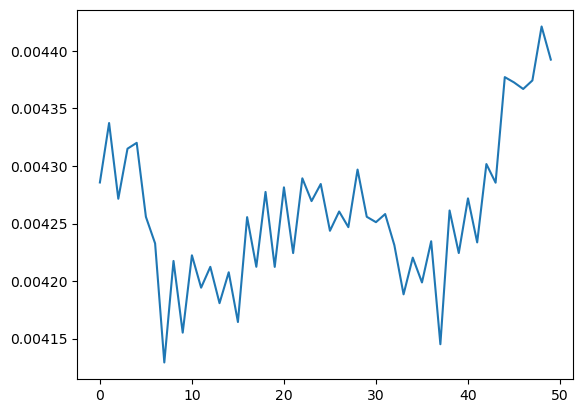

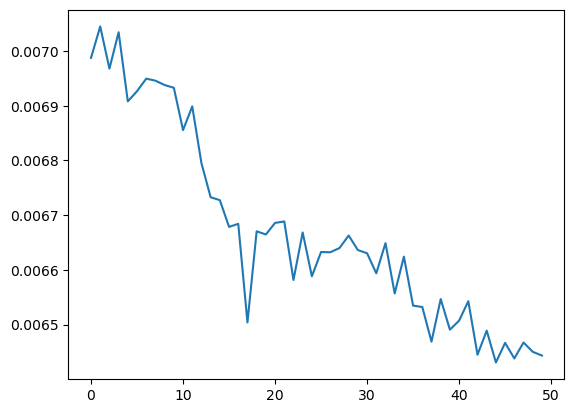

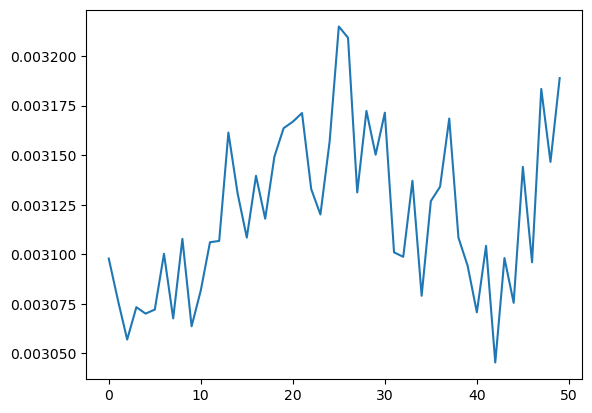

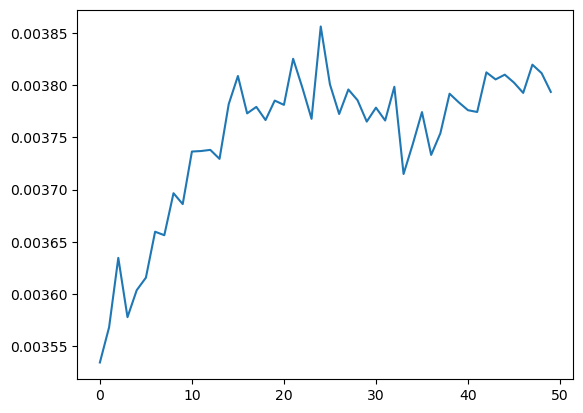

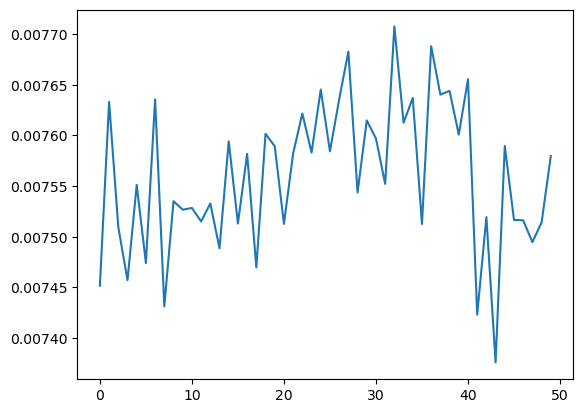

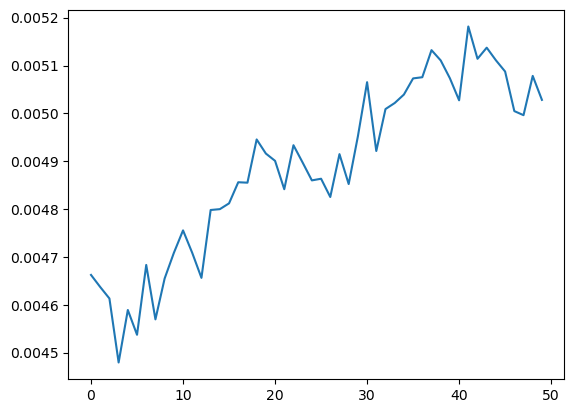

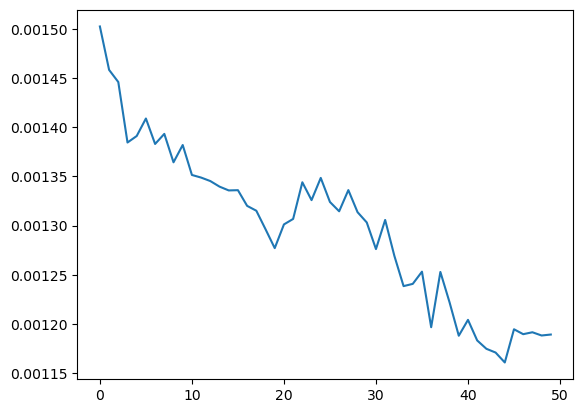

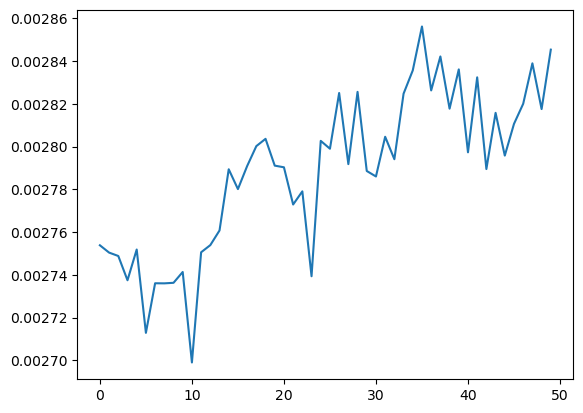

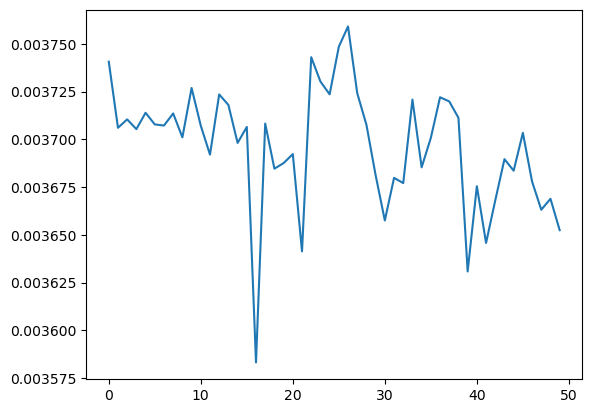

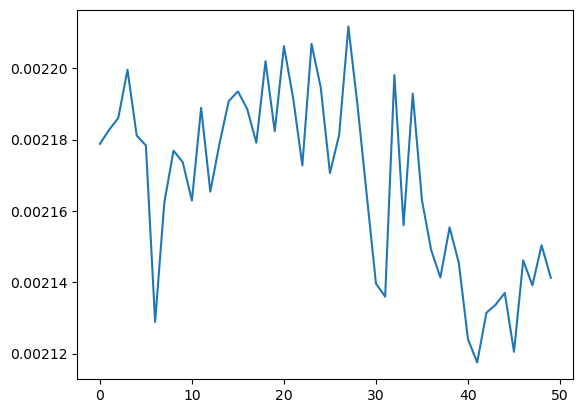

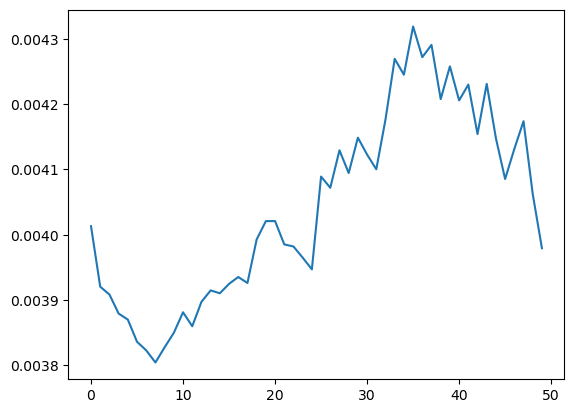

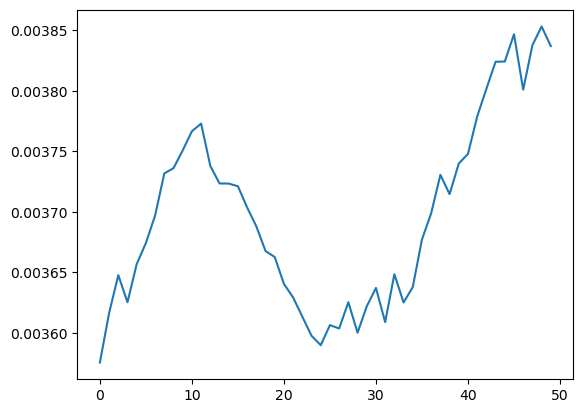

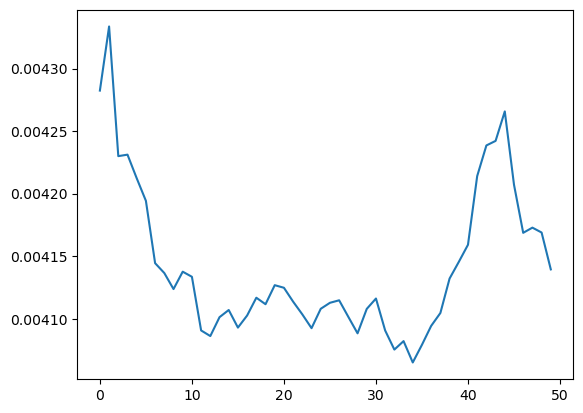

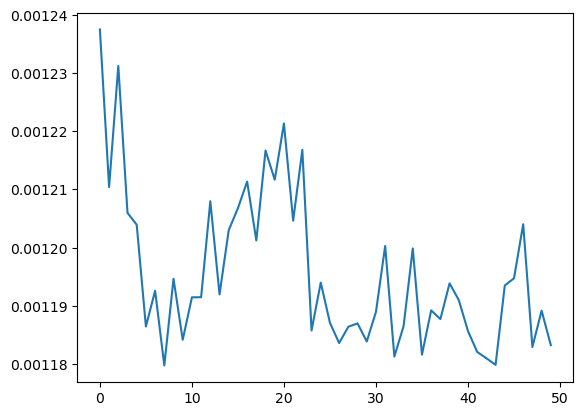

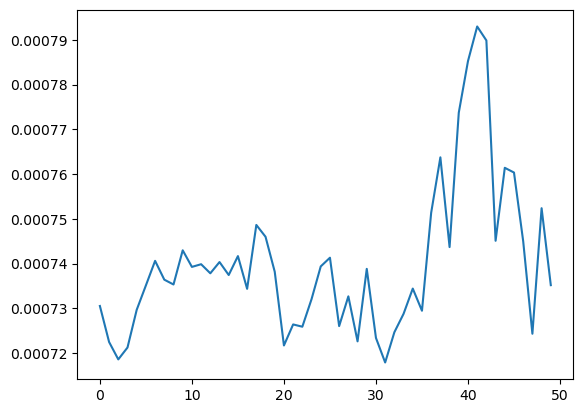

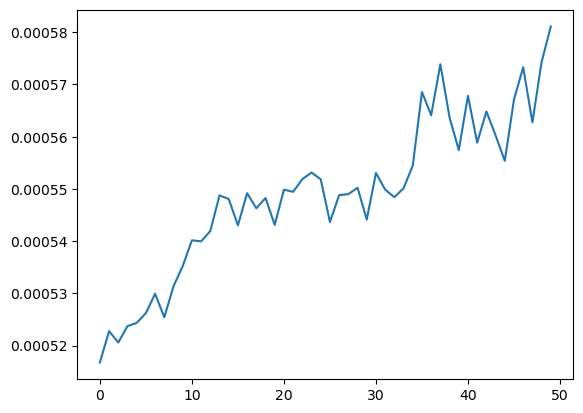

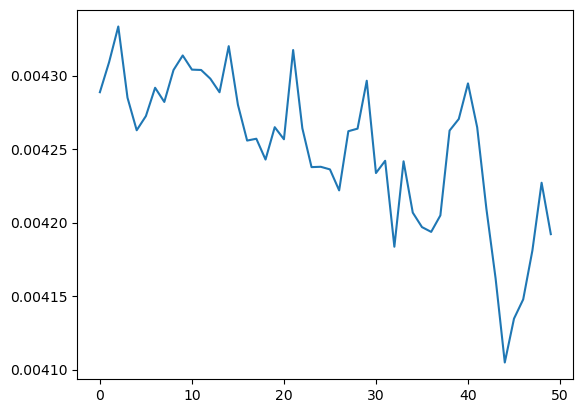

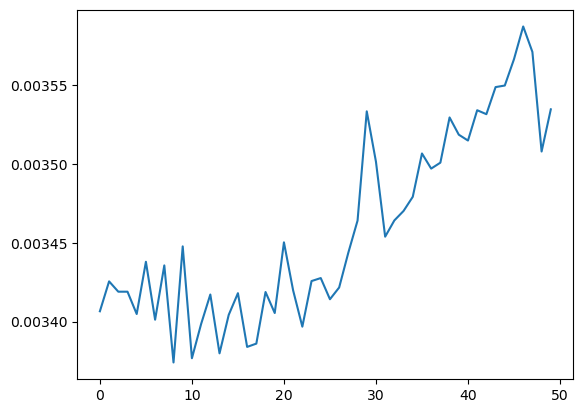

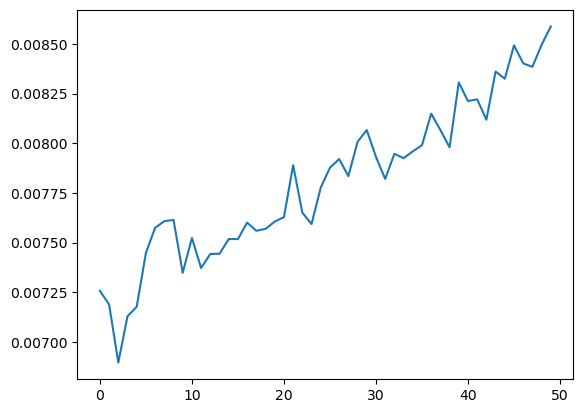

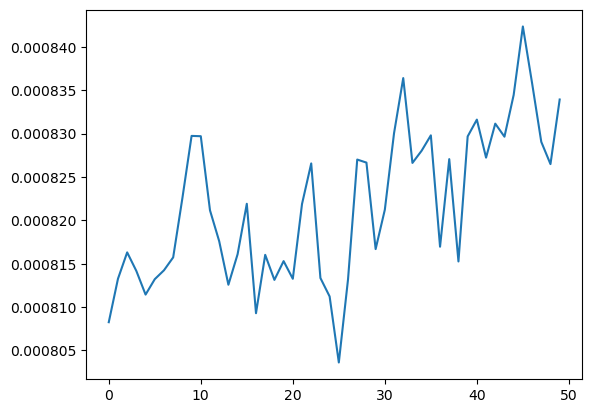

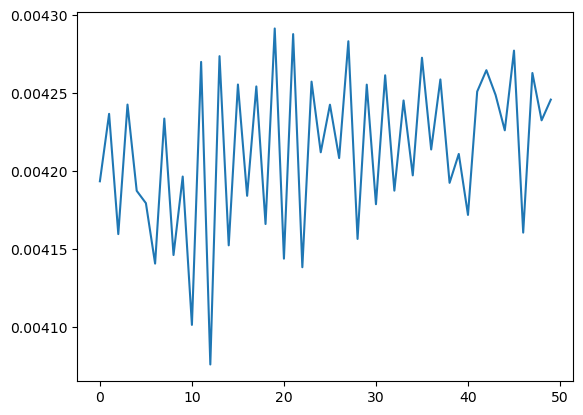

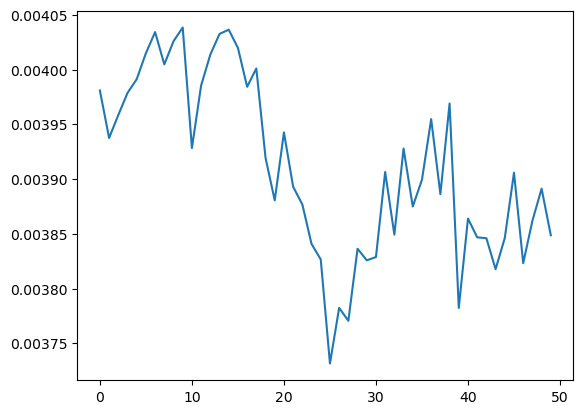

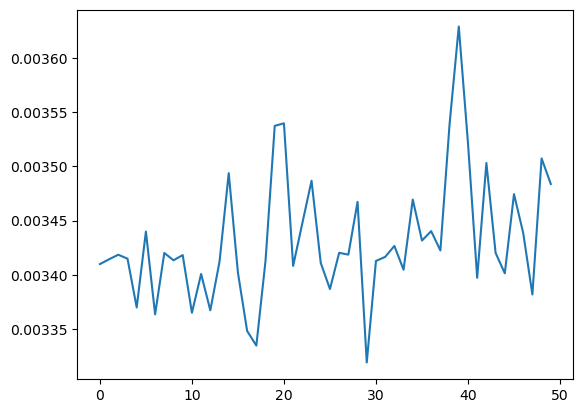

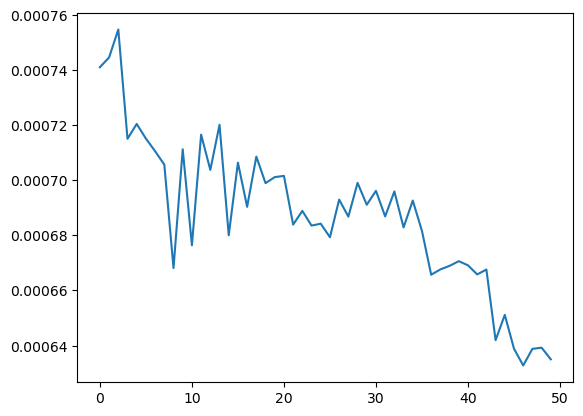

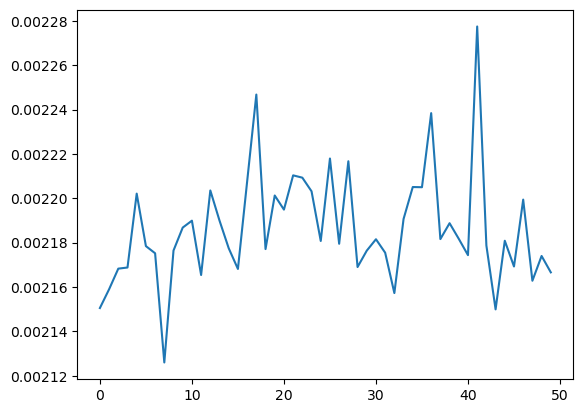

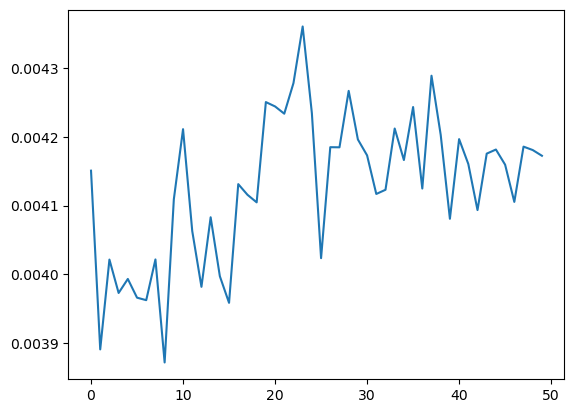

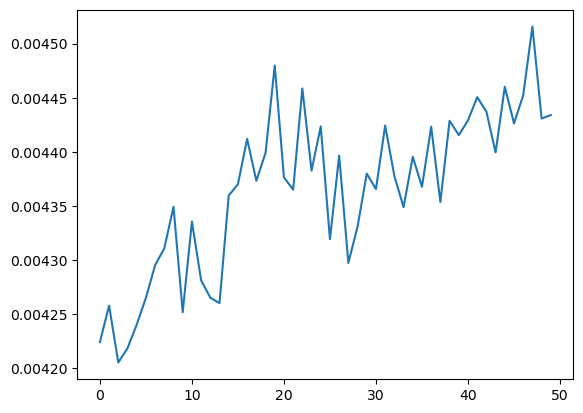

In [15]:
for i in range(36):
    #plt.plot(train_losses[i])
    plt.plot(test_losses[i][50:])
    plt.show()

In [19]:
X_train[:5,0,:10]

array([[0.09248015, 0.09668379, 0.07006072, 0.06585708, 0.07846801,
        0.07146193, 0.05418029, 0.04437179, 0.05464736, 0.05091079],
       [0.09668379, 0.07006072, 0.06585708, 0.07846801, 0.07146193,
        0.05418029, 0.04437179, 0.05464736, 0.05091079, 0.04297057],
       [0.07006072, 0.06585708, 0.07846801, 0.07146193, 0.05418029,
        0.04437179, 0.05464736, 0.05091079, 0.04297057, 0.05091079],
       [0.06585708, 0.07846801, 0.07146193, 0.05418029, 0.04437179,
        0.05464736, 0.05091079, 0.04297057, 0.05091079, 0.04764129],
       [0.07846801, 0.07146193, 0.05418029, 0.04437179, 0.05464736,
        0.05091079, 0.04297057, 0.05091079, 0.04764129, 0.04483886]])

In [22]:
y_train[0,:5]

array([0.05091079, 0.04764129, 0.04483886, 0.05978515, 0.06258758])

In [27]:
s = 0

for tl in test_losses:
    s += np.min(tl)

(s/36) ** 0.5

0.057773783110326264

In [26]:
s/36

0.0038528779663869906